Wczytaj dowolny zbiór danych z [repozytorium UCI](https://archive.ics.uci.edu/), a następnie:
* Wizualizuj rozkłady zmiennych. Można zastosować np. histogramy, wykresy słupkowe, wykresy punktowe, pairplot, mapy korelacji, etc.
* Sprawdź, czy w zbiorze znajdują się wartości brakujące lub odstające. Jeśli zbiór zawiera ewidentne błędy, oznacz je jako `NA`/`NaN`.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv("../data/bank-additional-full.csv", sep=";", na_values=["unknown"])
df.drop(columns=["y"], inplace=True)
df.head()

age        job  marital    education default housing loan    contact month  \
0   56  housemaid  married     basic.4y      no      no   no  telephone   may   
1   57   services  married  high.school     NaN      no   no  telephone   may   
2   37   services  married  high.school      no     yes   no  telephone   may   
3   40     admin.  married     basic.6y      no      no   no  telephone   may   
4   56   services  married  high.school      no      no  yes  telephone   may   

  day_of_week  duration  campaign  pdays  previous     poutcome  emp.var.rate  \
0         mon       261         1    999         0  nonexistent           1.1   
1         mon       149         1    999         0  nonexistent           1.1   
2         mon       226         1    999         0  nonexistent           1.1   
3         mon       151         1    999         0  nonexistent           1.1   
4         mon       307         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0          93.994          -36.4      4.857       5191.0  
1          93.994          -36.4      4.857       5191.0  
2          93.994          -36.4      4.857       5191.0  
3          93.994          -36.4      4.857       5191.0  
4          93.994          -36.4      4.857       5191.0

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

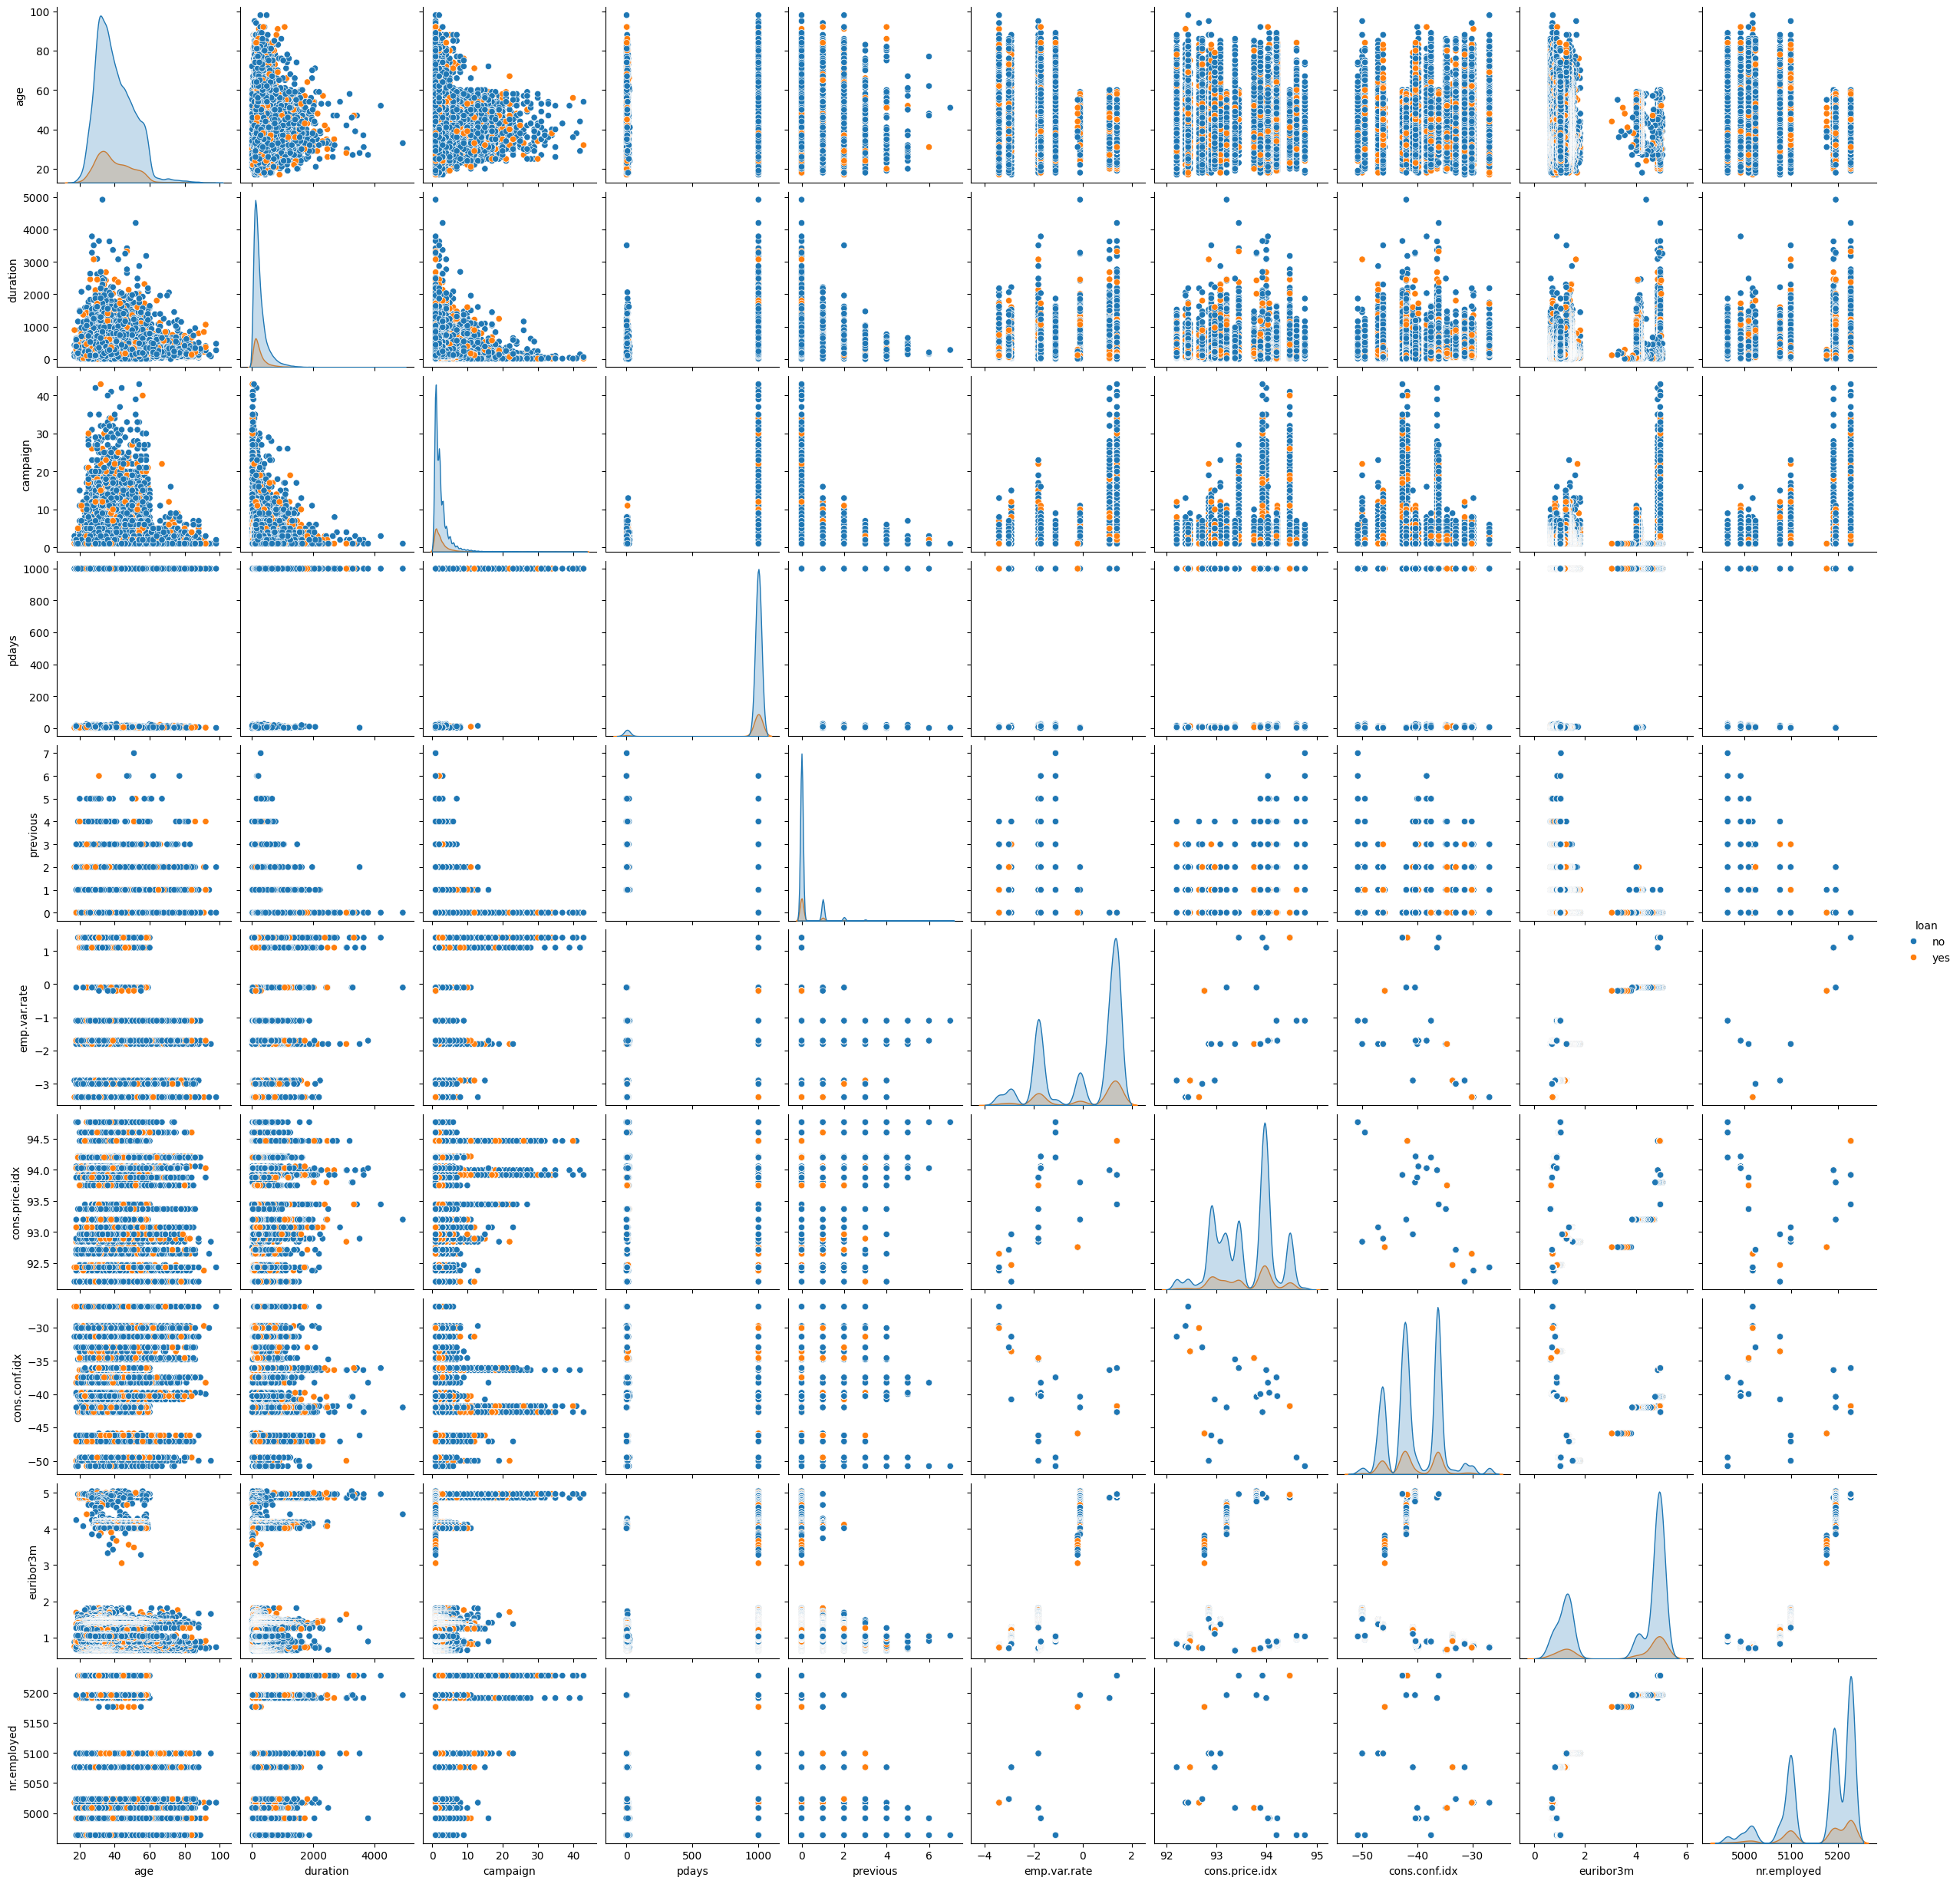

In [39]:
# Pairplot
sns.pairplot(df, hue='loan', diag_kind='kde')
plt.show()

/var/folders/dh/n09r5skj4tv2v3zp6v8qj3qr0000gn/T/ipykernel_14972/3225958746.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
/var/folders/dh/n09r5skj4tv2v3zp6v8qj3qr0000gn/T/ipykernel_14972/3225958746.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
/var/folders/dh/n09r5skj4tv2v3zp6v8qj3qr0000gn/T/ipykernel_14972/3225958746.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
/var/folders/dh/n09r5skj4tv2v3zp6v8qj3qr0000gn/T/ipykernel_14972/3225958746.py:13: UserWarning: set_ticklabels() should only be used 

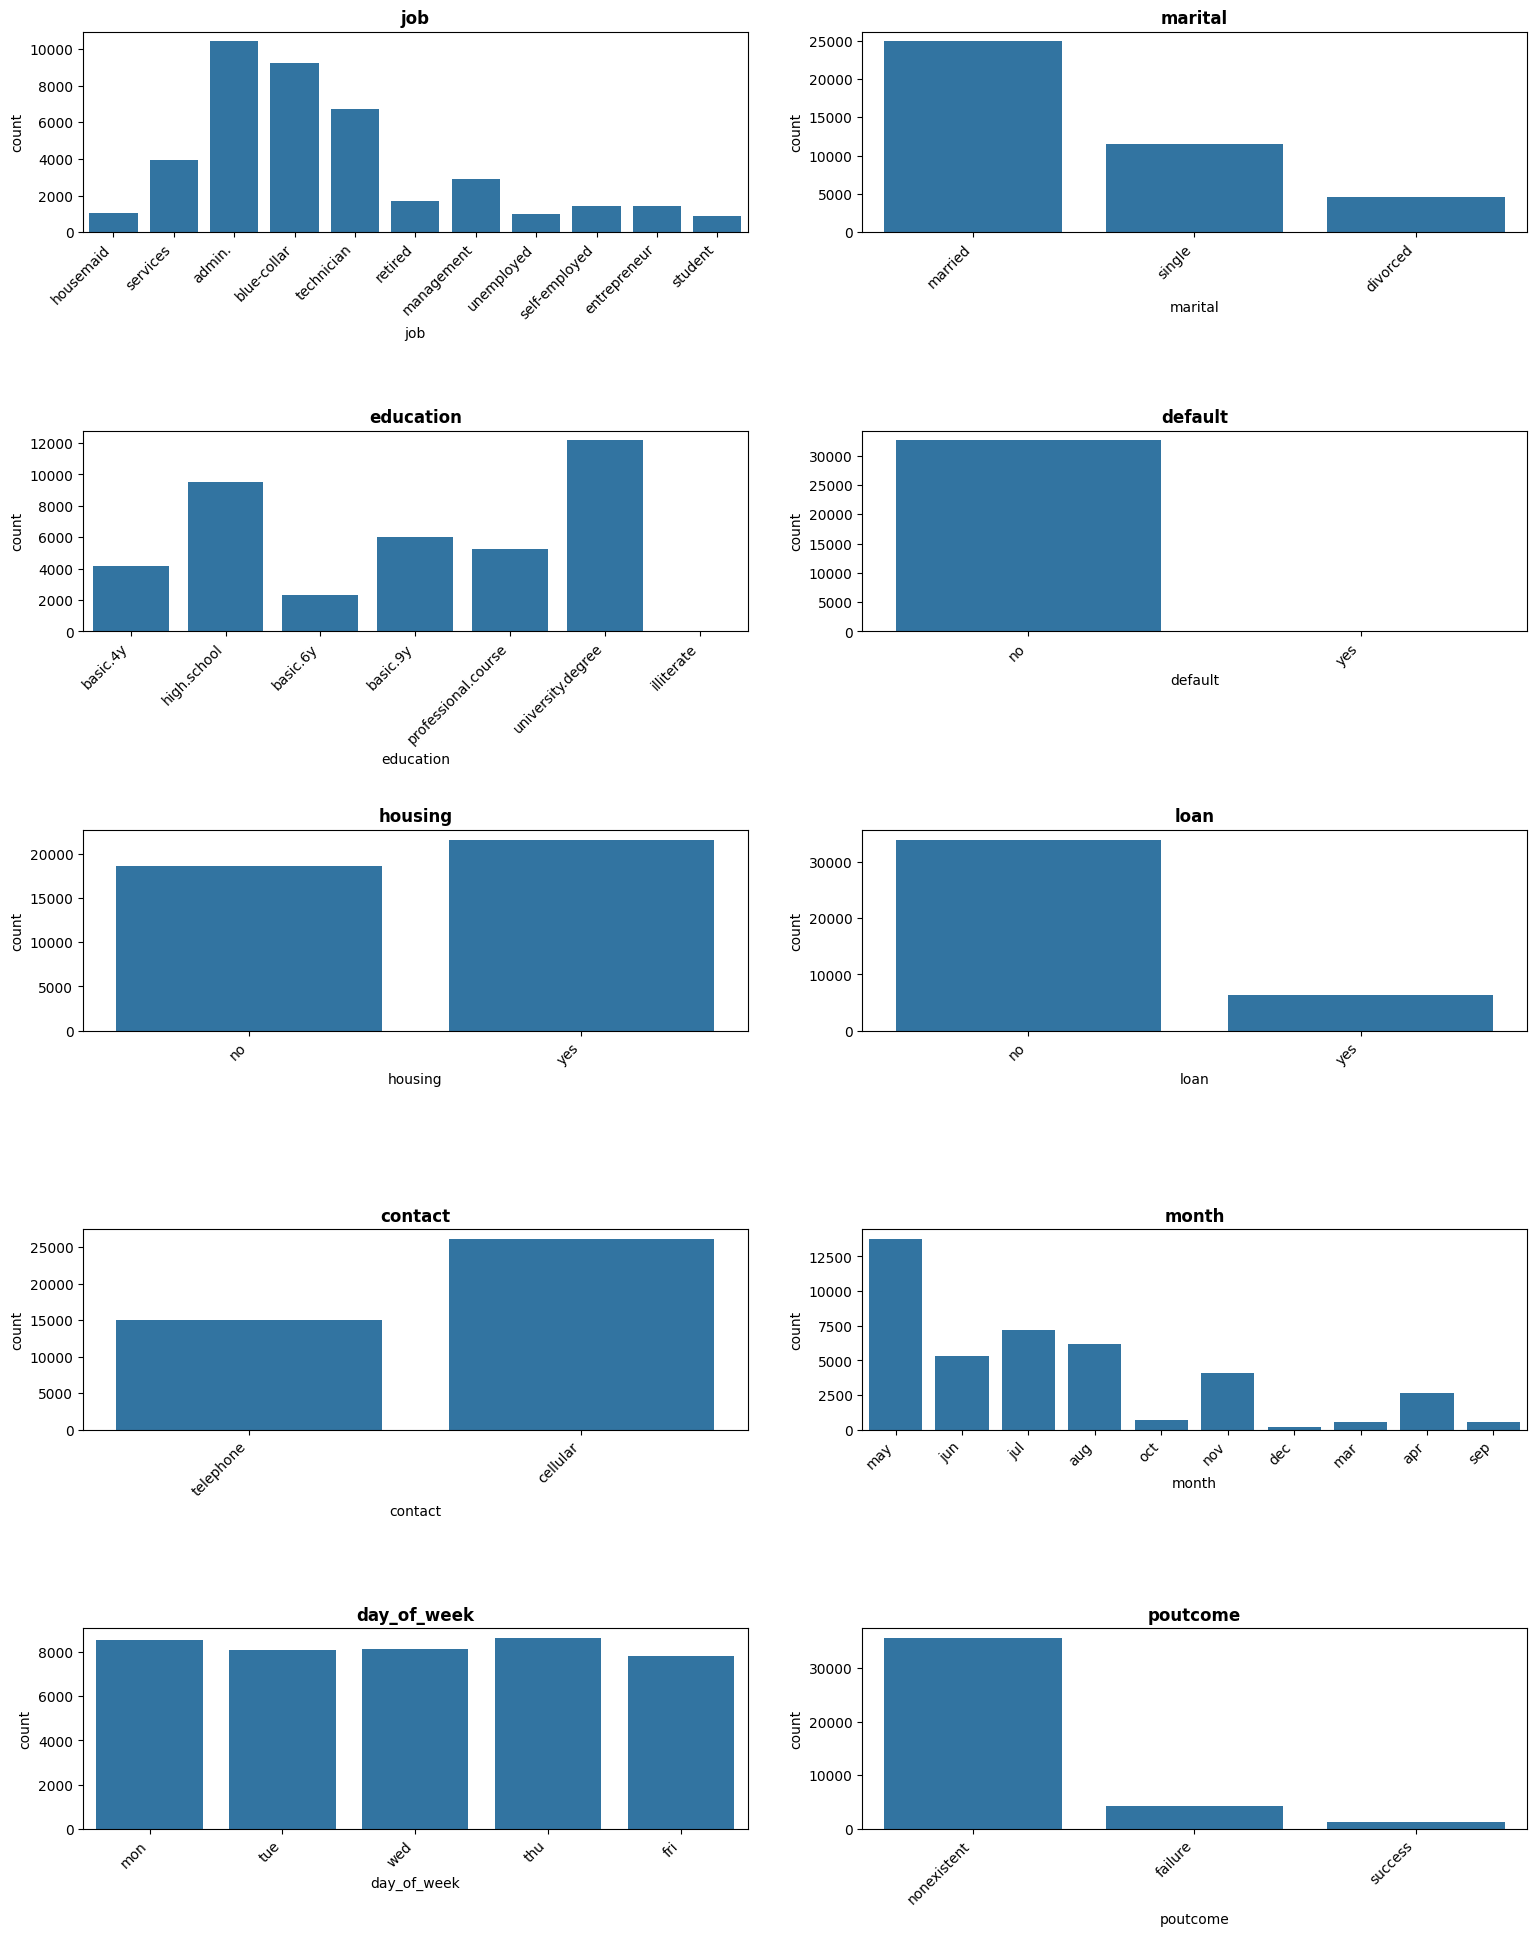

In [40]:
def plot_categorical_distribution(df):
    # Create a 5x2 grid to accommodate all 10 categorical columns
    fig, axes = plt.subplots(5, 2, figsize=(16, 20))
    axes = axes.flatten()
    
    # Get categorical columns
    cat_cols = df.select_dtypes(include=['object']).columns
    
    # Create the plots
    for i, col in enumerate(cat_cols):
        sns.countplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(col, fontsize=12, fontweight='bold')
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
        axes[i].tick_params(axis='x', labelsize=10)
        
    plt.tight_layout(pad=3.0)
    plt.show()

plot_categorical_distribution(df)

In [41]:
na_count = df.isna().sum(axis=1)
na_distribution = na_count.value_counts().sort_index()
print(na_distribution)

0    30488
1     9034
2     1338
3      306
4       20
5        2
Name: count, dtype: int64


In [42]:
# Remove rows with 3 or more missing values
df_clean = df[na_count < 3]

In [43]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40860 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             40860 non-null  int64  
 1   job             40610 non-null  object 
 2   marital         40788 non-null  object 
 3   education       39246 non-null  object 
 4   default         32564 non-null  object 
 5   housing         40121 non-null  object 
 6   loan            40121 non-null  object 
 7   contact         40860 non-null  object 
 8   month           40860 non-null  object 
 9   day_of_week     40860 non-null  object 
 10  duration        40860 non-null  int64  
 11  campaign        40860 non-null  int64  
 12  pdays           40860 non-null  int64  
 13  previous        40860 non-null  int64  
 14  poutcome        40860 non-null  object 
 15  emp.var.rate    40860 non-null  float64
 16  cons.price.idx  40860 non-null  float64
 17  cons.conf.idx   40860 non-null  floa

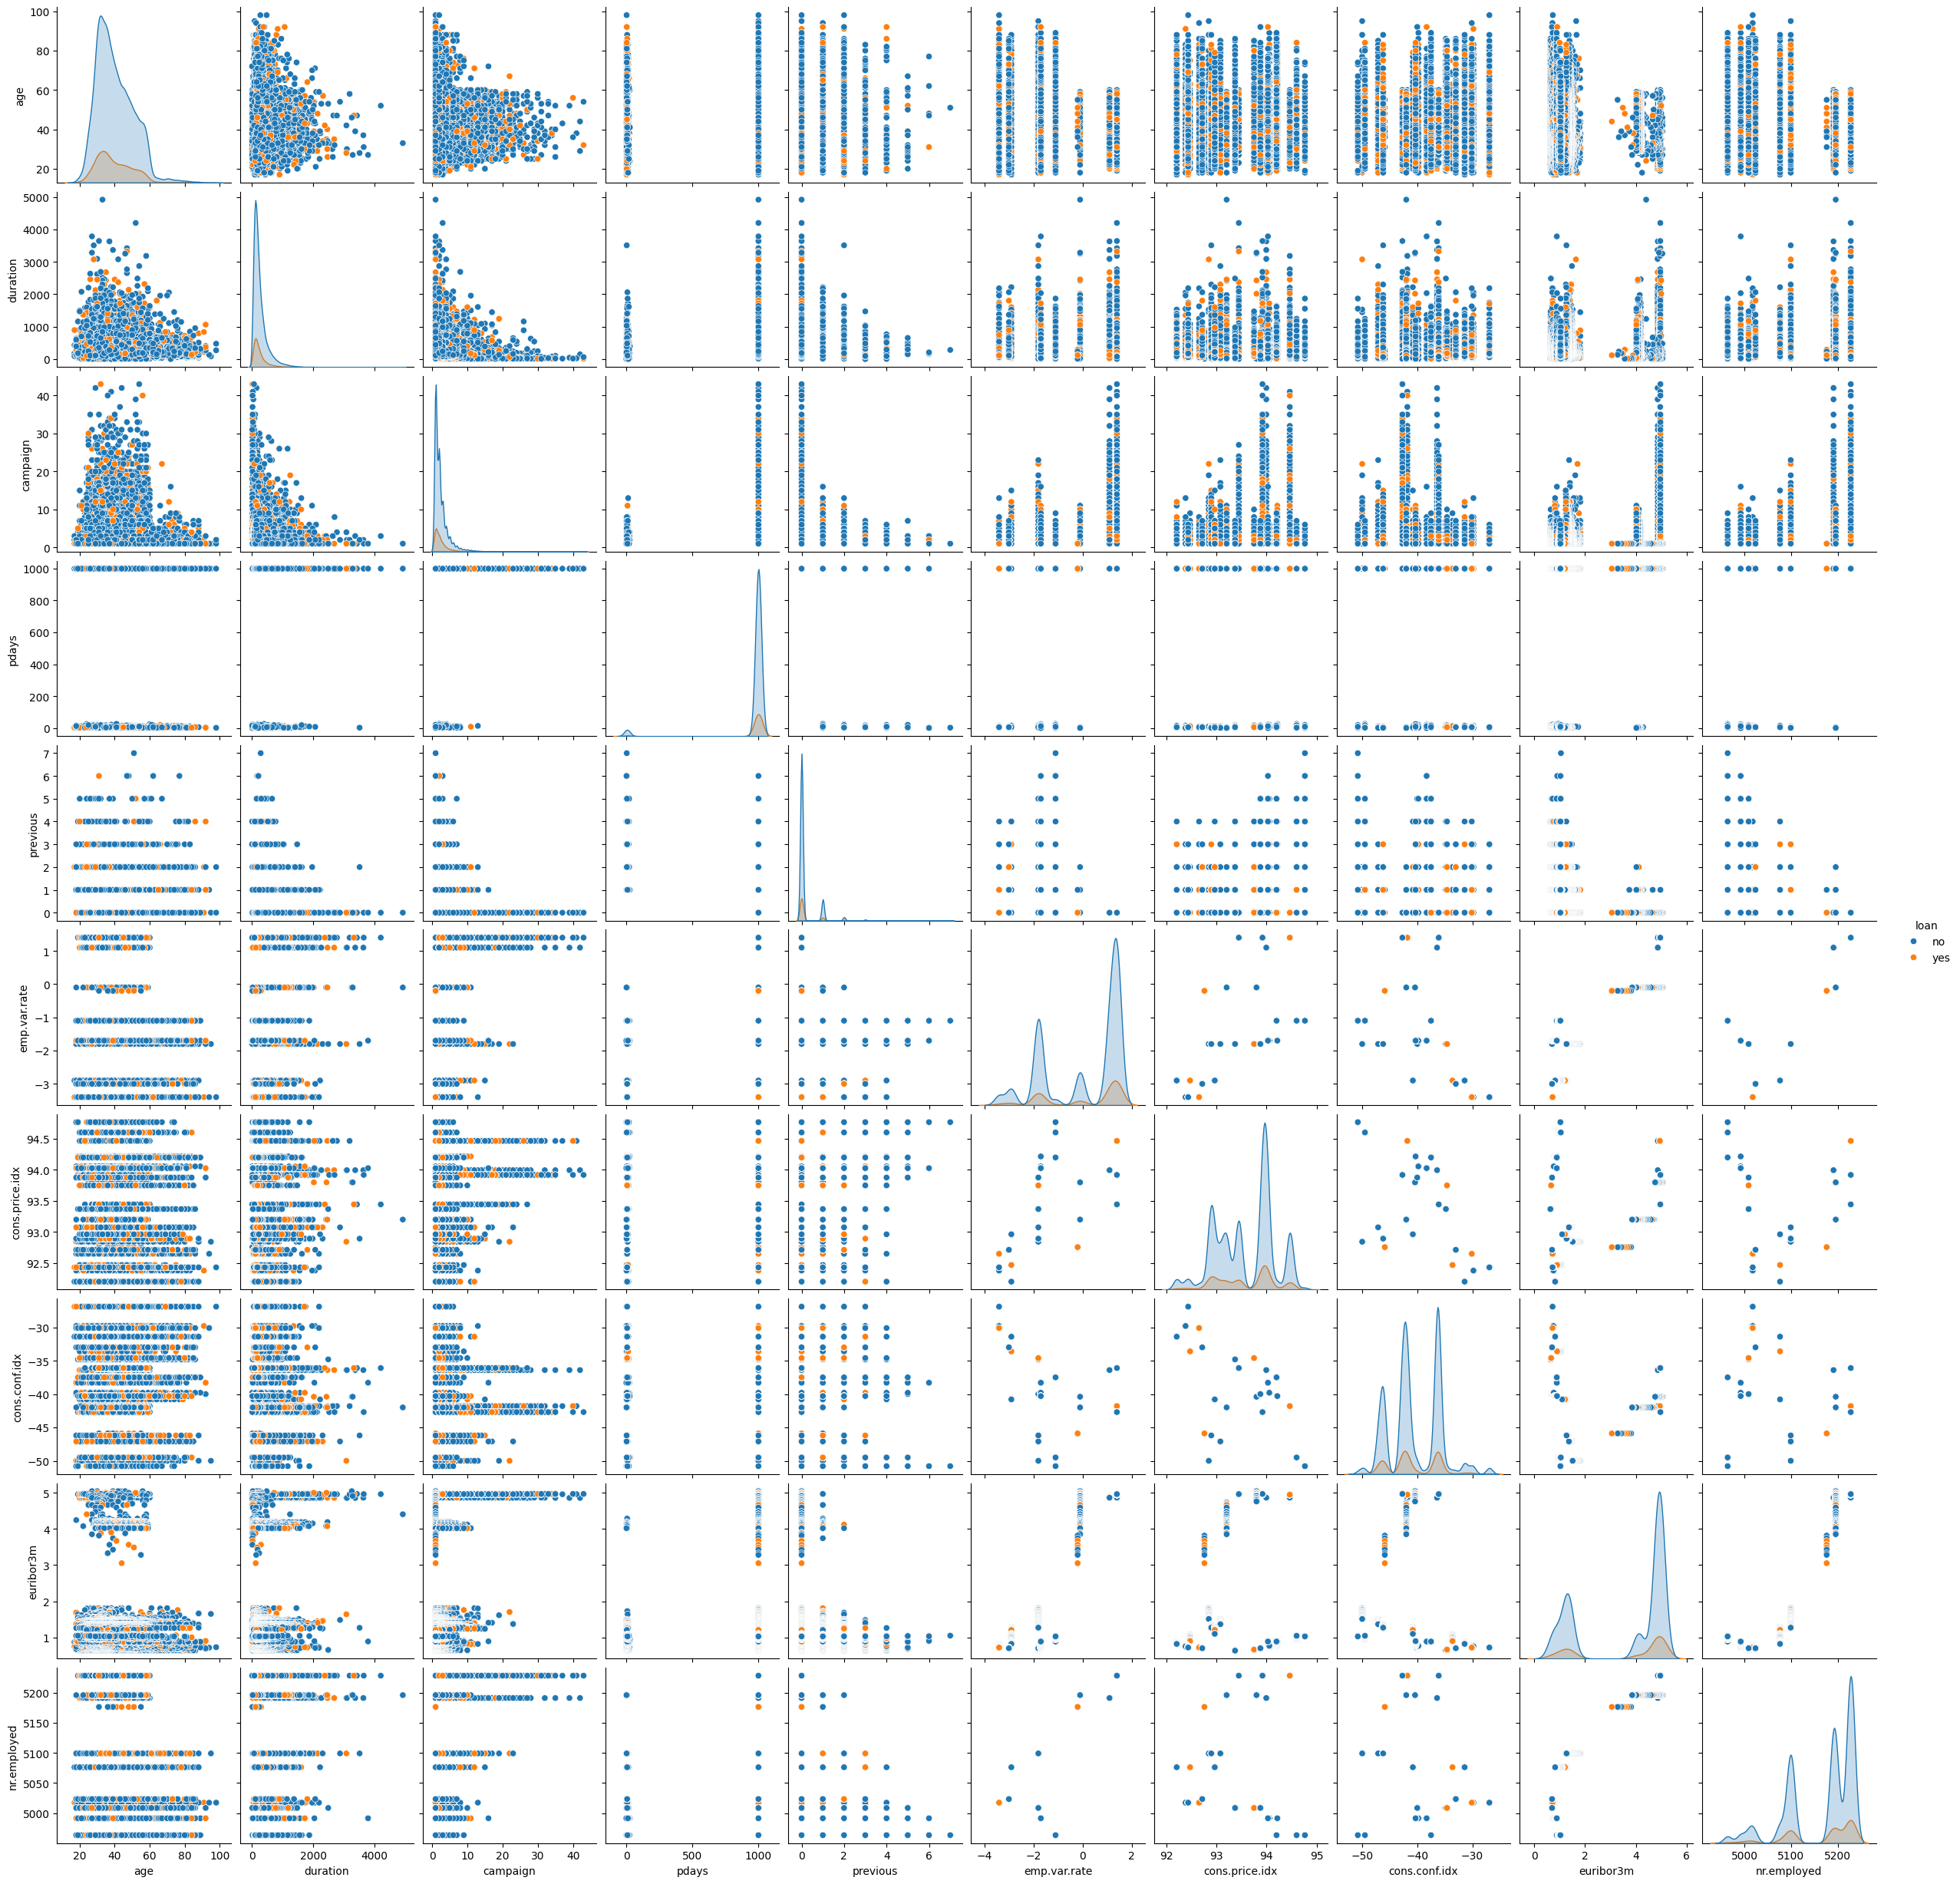

In [44]:
# Pairplot
sns.pairplot(df_clean, hue='loan', diag_kind='kde')
plt.show()

/var/folders/dh/n09r5skj4tv2v3zp6v8qj3qr0000gn/T/ipykernel_14972/3225958746.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
/var/folders/dh/n09r5skj4tv2v3zp6v8qj3qr0000gn/T/ipykernel_14972/3225958746.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
/var/folders/dh/n09r5skj4tv2v3zp6v8qj3qr0000gn/T/ipykernel_14972/3225958746.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
/var/folders/dh/n09r5skj4tv2v3zp6v8qj3qr0000gn/T/ipykernel_14972/3225958746.py:13: UserWarning: set_ticklabels() should only be used 

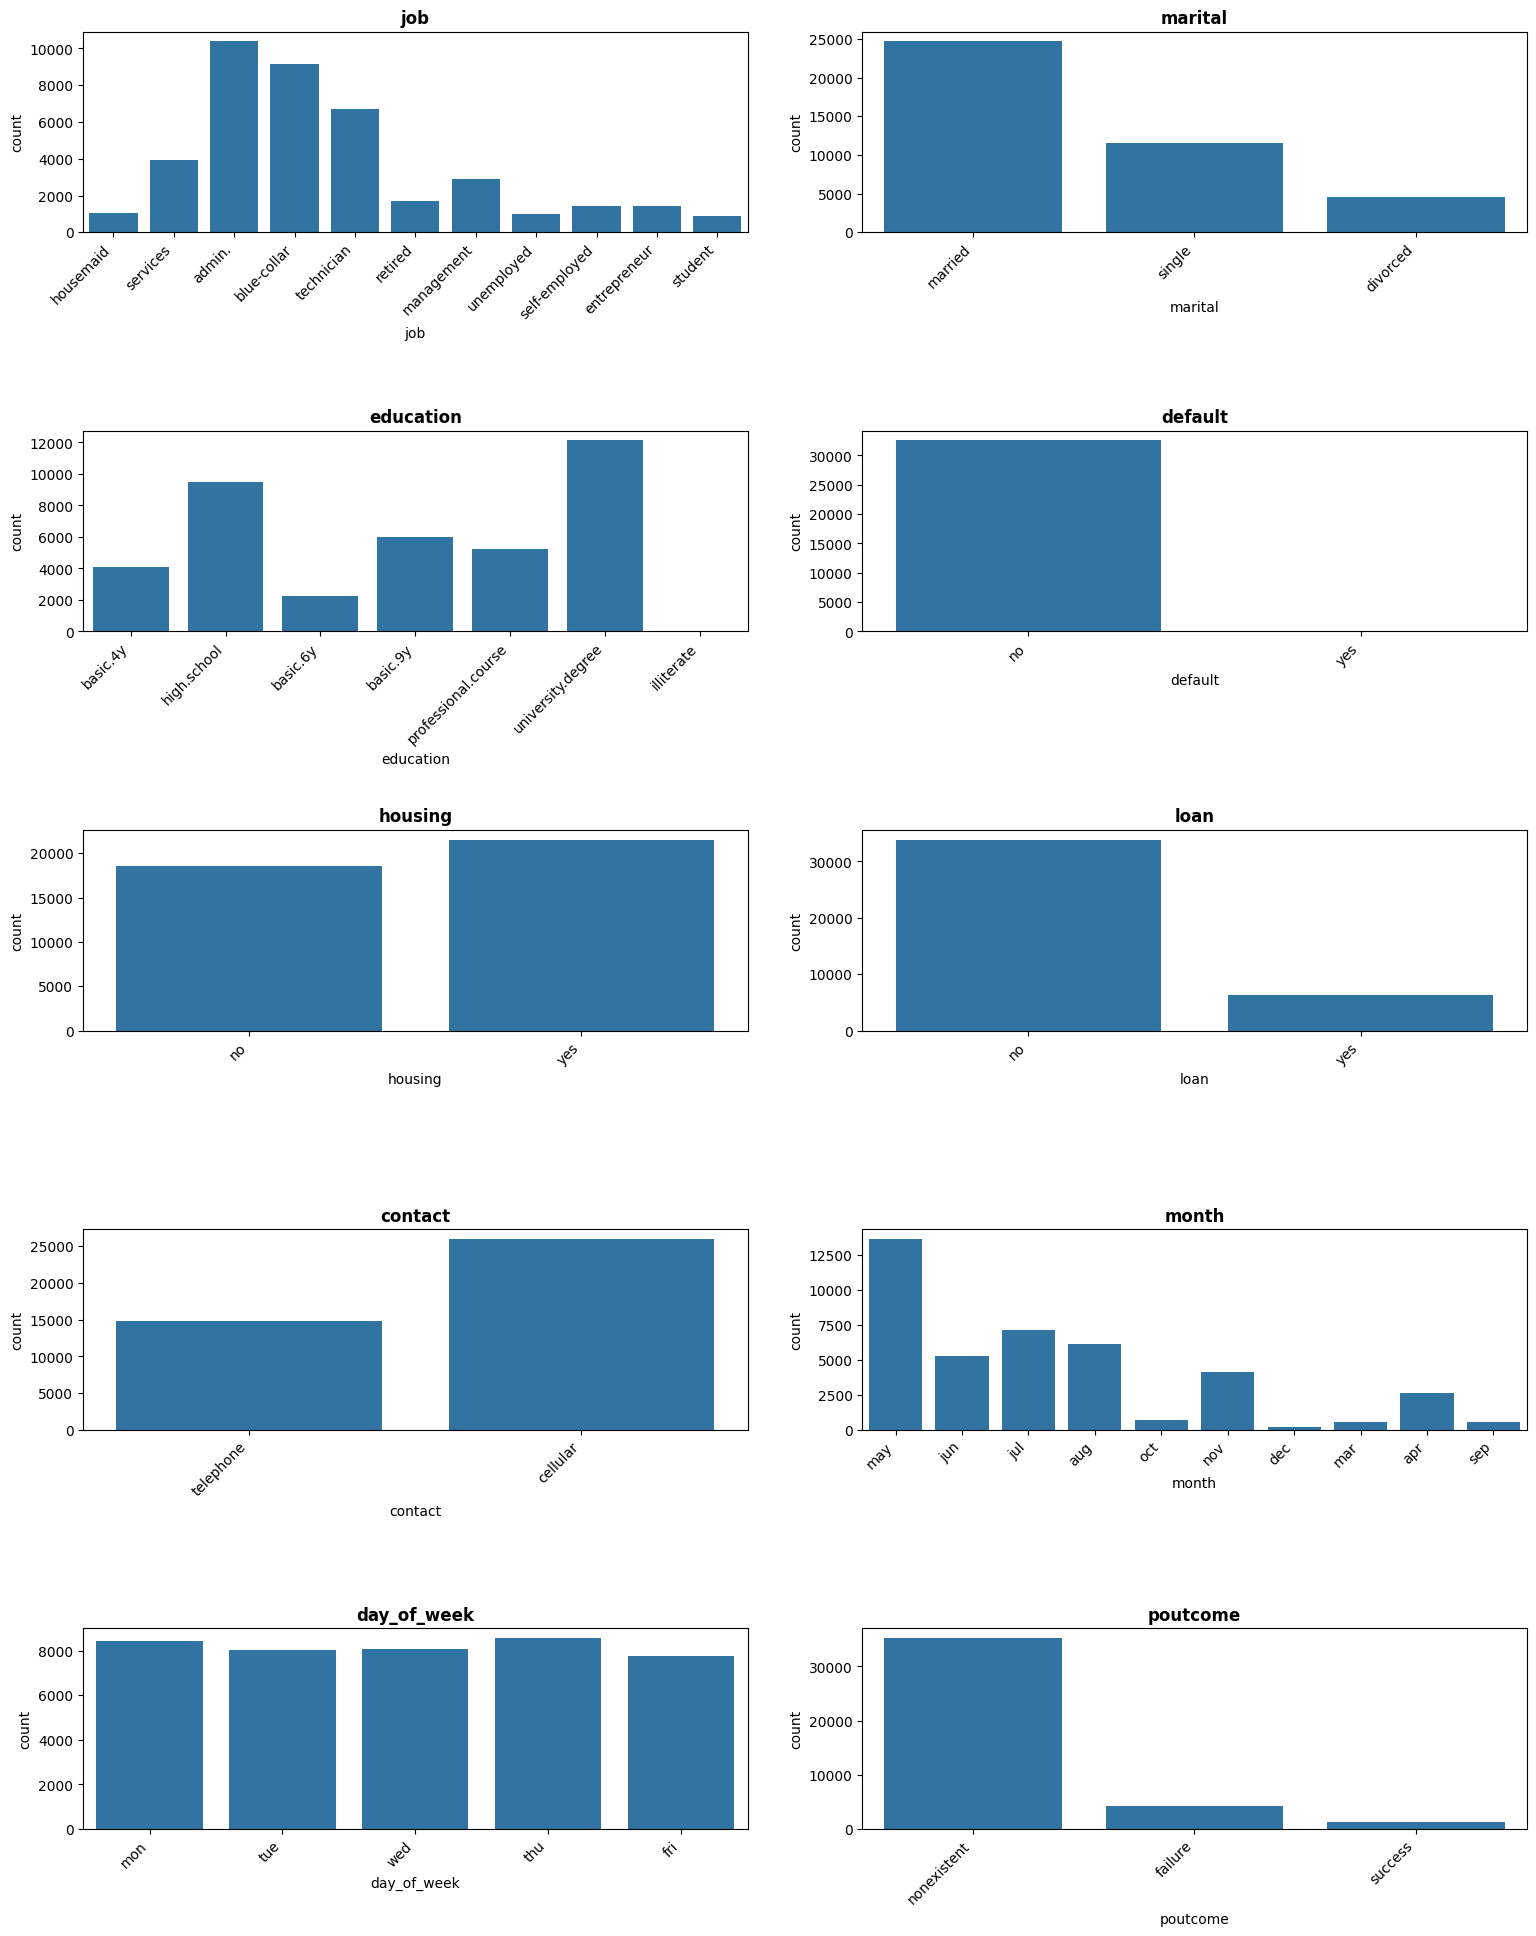

In [ ]:
plot_categorical_distribution(df_clean